In [38]:
import numpy as np
import cv2

In [39]:
def order_points(points):
    # Order points to [top-left, top-right, bottom-right, bottom-left].
    # Maintaining a consistent ordering of points is important.
    # Remind: image pixel coordinate
    """
    -------------> x
    |
    |
    |
    |
    |
    |
    v
    y
    """

    rect = np.zeros((4, 2), dtype='float32')  # return value

    # top-left will have the smallest sum (x + y)
    # bottom-right will have the largets sum (x + y)
    s = points.sum(axis=1)
    rect[0] = points[np.argmin(s)]
    rect[2] = points[np.argmax(s)]

    # top-right will have the smallest diff (y - x)
    # bottom-left will have the largest diff (y - x)
    diff = np.diff(points, axis=1)
    rect[1] = points[np.argmin(diff)]
    rect[3] = points[np.argmax(diff)]

    return rect


In [40]:
order_points(np.array([[0, 0], [1, 1], [0, 1], [1, 0]]))

array([[0., 0.],
       [1., 0.],
       [1., 1.],
       [0., 1.]], dtype=float32)

In [41]:
def four_points_transform(image, points):
    # Order points first
    rect = order_points(points)
    (tl, tr, br, bl) = rect

    # Compute the size of new transformed image
    """
    -------------> x
    |
    |  tl     tr
    |
    |
    |
    |  bl     br
    v
    y
    """
    
    widthA = np.sqrt((br[0] - bl[0])**2 + (br[1] - bl[1])**2)
    widthB = np.sqrt((tr[0] - tl[0])**2 + (tr[1] - tl[1])**2)
    maxWidth = max(int(widthA), int(widthB))

    heightA = np.sqrt((tr[0] - br[0])**2 + (tr[1] - br[1])**2)
    heightB = np.sqrt((tl[0] - bl[0])**2 + (tl[1] - bl[1])**2)
    maxHeight = max(int(heightA), int(heightB))

    dest = np.array([
        [0, 0],  # top-left corner
        [maxWidth, 0],  # top-right corner
        [maxWidth, maxHeight],  # bottom-right corner
        [0, maxHeight]  # bottom-left corner
    ], dtype='float32')

    # Compute the perspective transform matrix
    M = cv2.getPerspectiveTransform(rect, dest)
    # Apply it
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

    return warped


In [42]:
# Demonstration

import matplotlib.pyplot as plt
%matplotlib inline

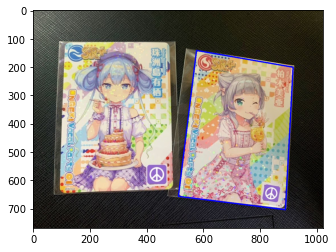

In [43]:
image = cv2.imread('./arisu_mia.JPG')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

points = np.array([[577, 142], [918, 201], [891, 703], [513, 656]])

warped = four_points_transform(image, points)

cv2.polylines(image, [points.reshape((-1, 1, 2))], True, (0, 0, 255), 3)

# cv2.imshow("image", image)
# cv2.imshow("warped", warped)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(image)
plt.show()

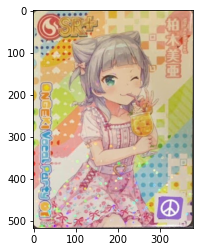

In [44]:
plt.imshow(warped)
plt.show()